# Import dependencies

In [22]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd
import sklearn
import spafe.utils.vis as vis
from scipy.io import wavfile
from sklearn.decomposition import PCA
# from PNCC.pncc import pncc
from spafe.features.pncc import pncc

# Converting mp3 file to wav

In [3]:
directory = input("Enter Directory\t\t\t: ")
os.chdir(rf"{directory}")
listFile = os.listdir()
newPath = os.path.join(directory, "wav")
try:
    os.mkdir(newPath)
except OSError as error:
    print(f"{error}\n")
for file in listFile:
    if len(file.split(".")) == 2 and file.split(".")[1] == "mp3":
        print(f"converting {file} at : {newPath}\{file.split('.')[0]}.wav")
        os.system(f"ffmpeg -i {file} {file.split('.')[0]}.wav")
        os.rename(os.path.join(directory, f"{file.split('.')[0]}.wav"), os.path.join(newPath, f"{file.split('.')[0]}.wav"))

converting muda10a.mp3 at : D:\Cool Yeah\Semester 118\coconut-maturity-classification\Sample-kelapa\data\cut_sample\muda\wav\muda10a.wav
converting muda10b.mp3 at : D:\Cool Yeah\Semester 118\coconut-maturity-classification\Sample-kelapa\data\cut_sample\muda\wav\muda10b.wav
converting muda10c.mp3 at : D:\Cool Yeah\Semester 118\coconut-maturity-classification\Sample-kelapa\data\cut_sample\muda\wav\muda10c.wav
converting muda11a.mp3 at : D:\Cool Yeah\Semester 118\coconut-maturity-classification\Sample-kelapa\data\cut_sample\muda\wav\muda11a.wav
converting muda11b.mp3 at : D:\Cool Yeah\Semester 118\coconut-maturity-classification\Sample-kelapa\data\cut_sample\muda\wav\muda11b.wav
converting muda11c.mp3 at : D:\Cool Yeah\Semester 118\coconut-maturity-classification\Sample-kelapa\data\cut_sample\muda\wav\muda11c.wav
converting muda12a.mp3 at : D:\Cool Yeah\Semester 118\coconut-maturity-classification\Sample-kelapa\data\cut_sample\muda\wav\muda12a.wav
converting muda12b.mp3 at : D:\Cool Yeah\

In [4]:
directory = input("Enter Directory\t\t\t: ")
os.chdir(rf"{directory}")
listFile = os.listdir()
newPath = os.path.join(directory, "wav")
try:
    os.mkdir(newPath)
except OSError as error:
    print(f"{error}\n")
for file in listFile:
    if len(file.split(".")) == 2 and file.split(".")[1] == "mp3":
        print(f"converting {file} at : {newPath}\{file.split('.')[0]}.wav")
        os.system(f"ffmpeg -i {file} {file.split('.')[0]}.wav")
        os.rename(os.path.join(directory, f"{file.split('.')[0]}.wav"), os.path.join(newPath, f"{file.split('.')[0]}.wav"))

converting mtg10a.mp3 at : D:\Cool Yeah\Semester 118\coconut-maturity-classification\Sample-kelapa\data\cut_sample\matang\wav\mtg10a.wav
converting mtg10b.mp3 at : D:\Cool Yeah\Semester 118\coconut-maturity-classification\Sample-kelapa\data\cut_sample\matang\wav\mtg10b.wav
converting mtg10c.mp3 at : D:\Cool Yeah\Semester 118\coconut-maturity-classification\Sample-kelapa\data\cut_sample\matang\wav\mtg10c.wav
converting mtg11a.mp3 at : D:\Cool Yeah\Semester 118\coconut-maturity-classification\Sample-kelapa\data\cut_sample\matang\wav\mtg11a.wav
converting mtg11b.mp3 at : D:\Cool Yeah\Semester 118\coconut-maturity-classification\Sample-kelapa\data\cut_sample\matang\wav\mtg11b.wav
converting mtg11c.mp3 at : D:\Cool Yeah\Semester 118\coconut-maturity-classification\Sample-kelapa\data\cut_sample\matang\wav\mtg11c.wav
converting mtg12a.mp3 at : D:\Cool Yeah\Semester 118\coconut-maturity-classification\Sample-kelapa\data\cut_sample\matang\wav\mtg12a.wav
converting mtg12b.mp3 at : D:\Cool Yeah\S

In [5]:
directory = input("Enter Directory\t\t\t: ")
os.chdir(rf"{directory}")
listFile = os.listdir()
newPath = os.path.join(directory, "wav")
try:
    os.mkdir(newPath)
except OSError as error:
    print(f"{error}\n")
for file in listFile:
    if len(file.split(".")) == 2 and file.split(".")[1] == "mp3":
        print(f"converting {file} at : {newPath}\{file.split('.')[0]}.wav")
        os.system(f"ffmpeg -i {file} {file.split('.')[0]}.wav")
        os.rename(os.path.join(directory, f"{file.split('.')[0]}.wav"), os.path.join(newPath, f"{file.split('.')[0]}.wav"))

converting tua10a.mp3 at : D:\Cool Yeah\Semester 118\coconut-maturity-classification\Sample-kelapa\data\cut_sample\tua\wav\tua10a.wav
converting tua10b.mp3 at : D:\Cool Yeah\Semester 118\coconut-maturity-classification\Sample-kelapa\data\cut_sample\tua\wav\tua10b.wav
converting tua10c.mp3 at : D:\Cool Yeah\Semester 118\coconut-maturity-classification\Sample-kelapa\data\cut_sample\tua\wav\tua10c.wav
converting tua11a.mp3 at : D:\Cool Yeah\Semester 118\coconut-maturity-classification\Sample-kelapa\data\cut_sample\tua\wav\tua11a.wav
converting tua11b.mp3 at : D:\Cool Yeah\Semester 118\coconut-maturity-classification\Sample-kelapa\data\cut_sample\tua\wav\tua11b.wav
converting tua11c.mp3 at : D:\Cool Yeah\Semester 118\coconut-maturity-classification\Sample-kelapa\data\cut_sample\tua\wav\tua11c.wav
converting tua12a.mp3 at : D:\Cool Yeah\Semester 118\coconut-maturity-classification\Sample-kelapa\data\cut_sample\tua\wav\tua12a.wav
converting tua12b.mp3 at : D:\Cool Yeah\Semester 118\coconut-m

# Creating dataframe

In [2]:
cocoDataMP3 = {
    'file_name' : [],
    'class_name' : []
}
for matStage in os.listdir('./Sample-kelapa/data/cut_sample'):
    for fileName in os.listdir(f'./Sample-kelapa/data/cut_sample/{matStage}'):
        if os.path.isfile(os.path.join(f'./Sample-kelapa/data/cut_sample/{matStage}', fileName)):
            if matStage.split('-')[-1] == 'muda':
                cocoDataMP3['file_name'].append(fileName)
                cocoDataMP3['class_name'].append('immature')
            elif matStage.split('-')[-1] == 'matang':
                cocoDataMP3['file_name'].append(fileName)
                cocoDataMP3['class_name'].append('mature')
            elif matStage.split('-')[-1] == 'tua':
                cocoDataMP3['file_name'].append(fileName)
                cocoDataMP3['class_name'].append('overmature')

df_mp3 = pd.DataFrame(cocoDataMP3)
df_mp3

,file_name,class_name
0,mtg10a.mp3,mature
1,mtg10b.mp3,mature
2,mtg10c.mp3,mature
3,mtg11a.mp3,mature
4,mtg11b.mp3,mature
...,...,...
175,tua8b.mp3,overmature
176,tua8c.mp3,overmature
177,tua9a.mp3,overmature
178,tua9b.mp3,overmature


In [3]:
cocoDataWAV = {
    'file_name' : [],
    'class_name' : []
}
for matStage in os.listdir('./Sample-kelapa/data/cut_sample'):
    for fileName in os.listdir(f'./Sample-kelapa/data/cut_sample/{matStage}/wav'):
        if os.path.isfile(os.path.join(f'./Sample-kelapa/data/cut_sample/{matStage}/wav', fileName)):
            if matStage.split('-')[-1] == 'muda':
                cocoDataWAV['file_name'].append(fileName)
                cocoDataWAV['class_name'].append('immature')
            elif matStage.split('-')[-1] == 'matang':
                cocoDataWAV['file_name'].append(fileName)
                cocoDataWAV['class_name'].append('mature')
            elif matStage.split('-')[-1] == 'tua':
                cocoDataWAV['file_name'].append(fileName)
                cocoDataWAV['class_name'].append('overmature')

df_wav = pd.DataFrame(cocoDataWAV)
df_wav

,file_name,class_name
0,mtg10a.wav,mature
1,mtg10b.wav,mature
2,mtg10c.wav,mature
3,mtg11a.wav,mature
4,mtg11b.wav,mature
...,...,...
175,tua8b.wav,overmature
176,tua8c.wav,overmature
177,tua9a.wav,overmature
178,tua9b.wav,overmature


In [4]:
base_dir = './Sample-kelapa/data/cut_sample/'
wav_fullpath = []
mp3_fullpath = []

for matStage in os.listdir(base_dir):
    for fileName in os.listdir(os.path.join(base_dir, matStage)):
        if os.path.isfile(os.path.join(os.path.join(base_dir, matStage), fileName)):
            mp3_fullpath.append(f"{base_dir}{matStage}/{fileName}")
            wav_fullpath.append(f"{base_dir}{matStage}/wav/{fileName.split('.')[0]}.wav")
            
df_mp3['full_path'] = mp3_fullpath
df_wav['full_path'] = wav_fullpath

In [5]:
data_csv_mp3 = df_mp3[['full_path', 'file_name', 'class_name']]
data_csv_wav = df_wav[['full_path', 'file_name', 'class_name']]
display(data_csv_wav, data_csv_mp3)

,full_path,file_name,class_name
0,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg10a.wav,mature
1,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg10b.wav,mature
2,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg10c.wav,mature
3,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg11a.wav,mature
4,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg11b.wav,mature
...,...,...,...
175,./Sample-kelapa/data/cut_sample/tua/wav/tua8b.wav,tua8b.wav,overmature
176,./Sample-kelapa/data/cut_sample/tua/wav/tua8c.wav,tua8c.wav,overmature
177,./Sample-kelapa/data/cut_sample/tua/wav/tua9a.wav,tua9a.wav,overmature
178,./Sample-kelapa/data/cut_sample/tua/wav/tua9b.wav,tua9b.wav,overmature


,full_path,file_name,class_name
0,./Sample-kelapa/data/cut_sample/matang/mtg10a.mp3,mtg10a.mp3,mature
1,./Sample-kelapa/data/cut_sample/matang/mtg10b.mp3,mtg10b.mp3,mature
2,./Sample-kelapa/data/cut_sample/matang/mtg10c.mp3,mtg10c.mp3,mature
3,./Sample-kelapa/data/cut_sample/matang/mtg11a.mp3,mtg11a.mp3,mature
4,./Sample-kelapa/data/cut_sample/matang/mtg11b.mp3,mtg11b.mp3,mature
...,...,...,...
175,./Sample-kelapa/data/cut_sample/tua/tua8b.mp3,tua8b.mp3,overmature
176,./Sample-kelapa/data/cut_sample/tua/tua8c.mp3,tua8c.mp3,overmature
177,./Sample-kelapa/data/cut_sample/tua/tua9a.mp3,tua9a.mp3,overmature
178,./Sample-kelapa/data/cut_sample/tua/tua9b.mp3,tua9b.mp3,overmature


In [6]:
data_csv_wav.to_csv('coconut-maturity-dataset-wav-luar-kotak.csv', index=False)
data_csv_mp3.to_csv('coconut-maturity-dataset-mp3-luar-kotak.csv', index=False)

# Preprocessing

In [2]:
df_wav = pd.read_csv('./coconut-maturity-dataset-wav-luar-kotak.csv')
df_mp3 = pd.read_csv('./coconut-maturity-dataset-mp3-luar-kotak.csv')
display(df_wav, df_mp3)

,full_path,file_name,class_name
0,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg10a.wav,mature
1,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg10b.wav,mature
2,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg10c.wav,mature
3,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg11a.wav,mature
4,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg11b.wav,mature
...,...,...,...
175,./Sample-kelapa/data/cut_sample/tua/wav/tua8b.wav,tua8b.wav,overmature
176,./Sample-kelapa/data/cut_sample/tua/wav/tua8c.wav,tua8c.wav,overmature
177,./Sample-kelapa/data/cut_sample/tua/wav/tua9a.wav,tua9a.wav,overmature
178,./Sample-kelapa/data/cut_sample/tua/wav/tua9b.wav,tua9b.wav,overmature


,full_path,file_name,class_name
0,./Sample-kelapa/data/cut_sample/matang/mtg10a.mp3,mtg10a.mp3,mature
1,./Sample-kelapa/data/cut_sample/matang/mtg10b.mp3,mtg10b.mp3,mature
2,./Sample-kelapa/data/cut_sample/matang/mtg10c.mp3,mtg10c.mp3,mature
3,./Sample-kelapa/data/cut_sample/matang/mtg11a.mp3,mtg11a.mp3,mature
4,./Sample-kelapa/data/cut_sample/matang/mtg11b.mp3,mtg11b.mp3,mature
...,...,...,...
175,./Sample-kelapa/data/cut_sample/tua/tua8b.mp3,tua8b.mp3,overmature
176,./Sample-kelapa/data/cut_sample/tua/tua8c.mp3,tua8c.mp3,overmature
177,./Sample-kelapa/data/cut_sample/tua/tua9a.mp3,tua9a.mp3,overmature
178,./Sample-kelapa/data/cut_sample/tua/tua9b.mp3,tua9b.mp3,overmature


In [3]:
df_wav['class_name'].value_counts()

class_name
mature        60
immature      60
overmature    60
Name: count, dtype: int64

In [4]:
immature = df_wav[df_wav['class_name'] == "immature"].sample(1, random_state = 4)['full_path'].values[0]
mature = df_wav[df_wav['class_name'] == "mature"].sample(1, random_state = 30)['full_path'].values[0]
overmature = df_wav[df_wav['class_name'] == "overmature"].sample(1, random_state = 3)['full_path'].values[0]

classes = ['immature', 'mature', 'overmature']

print(f"immature\t: {immature}")
print(f"mature\t\t: {mature}")
print(f"overmature\t: {overmature}")

immature	: ./Sample-kelapa/data/cut_sample/muda/wav/muda11b.wav
mature		: ./Sample-kelapa/data/cut_sample/matang/wav/mtg16b.wav
overmature	: ./Sample-kelapa/data/cut_sample/tua/wav/tua5c.wav


In [12]:
def createWaveplot(data, sampleRate, maturity, color):
    plt.figure(figsize=(8,2))
    plt.title(f'Waveplot for {maturity} maturity', size = 15, pad = 20)
    librosa.display.waveshow(data, sr=sampleRate, color=color)
    plt.show()

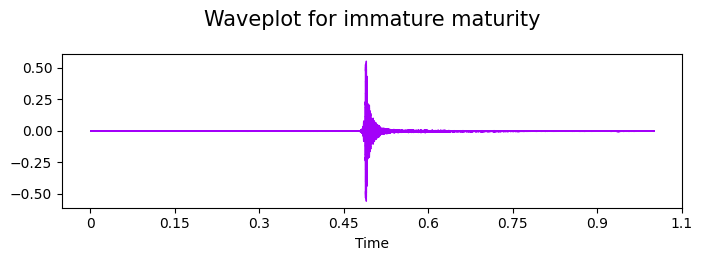

In [13]:
audio_immature, sr_immature = librosa.load(immature)
createWaveplot(audio_immature, sr_immature, "immature", '#A300F9')
ipd.Audio(immature)

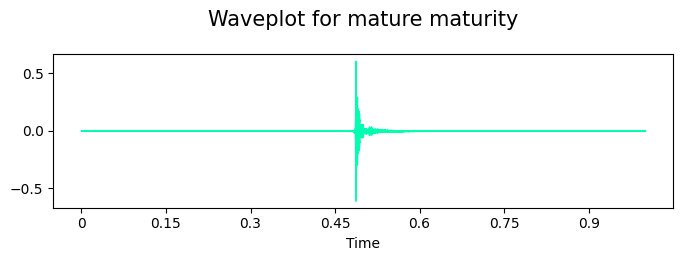

In [14]:
audio_mature, sr_mature = librosa.load(mature)
createWaveplot(audio_mature, sr_mature, "mature", '#00FFB0')
ipd.Audio(mature)

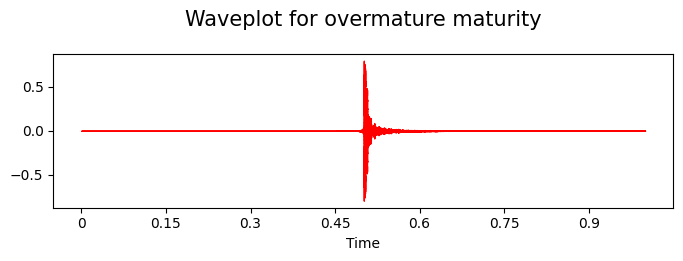

In [15]:
audio_overmature, sr_overmature = librosa.load(overmature)
createWaveplot(audio_overmature, sr_overmature, "overmature", '#FF0000')
ipd.Audio(overmature)

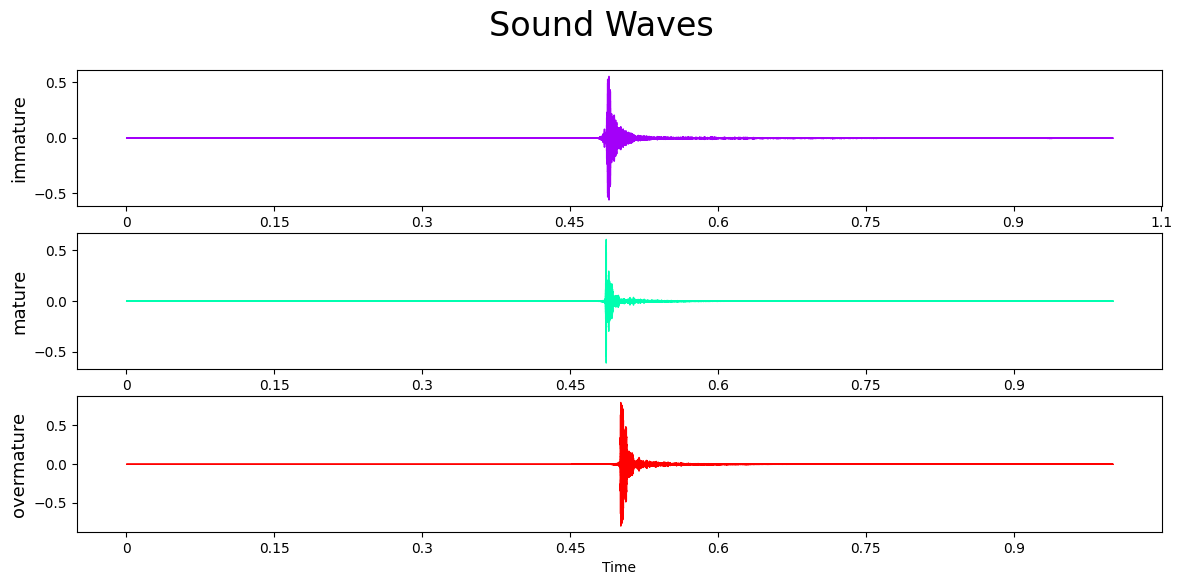

In [16]:
fig, ax = plt.subplots(3, figsize = (14, 6))
fig.suptitle('Sound Waves', fontsize=24)

librosa.display.waveshow(y = audio_immature, sr = sr_immature, color='#A300F9', ax=ax[0])
librosa.display.waveshow(y = audio_mature, sr = sr_mature, color='#00FFB0', ax=ax[1])
librosa.display.waveshow(y = audio_overmature, sr = sr_overmature, color='#FF0000', ax=ax[2])

for i, name in zip(range(3), classes):
    ax[i].set_ylabel(name, fontsize=13)

# Feature extraction

In [17]:
pnccs = []
vector_size = []

for filename in df_wav['full_path'].values:
    wavSig, sampRate = librosa.load(filename)
    result = pncc(wavSig, fs=sampRate)
    pnccs.append(result)
    vector_size.append(result.shape)

d:\Cool Yeah\Semester 118\coconut-maturity-classification\envSkripsi\lib\site-packages\spafe\features\pncc.py:169: RuntimeWarning: invalid value encountered in scalar divide
  [R_tilde[m, lprime] / Q_tilde[m, lprime] for lprime in range(l1, l2)]
d:\Cool Yeah\Semester 118\coconut-maturity-classification\envSkripsi\lib\site-packages\spafe\features\pncc.py:169: RuntimeWarning: divide by zero encountered in scalar divide
  [R_tilde[m, lprime] / Q_tilde[m, lprime] for lprime in range(l1, l2)]
d:\Cool Yeah\Semester 118\coconut-maturity-classification\envSkripsi\lib\site-packages\spafe\features\pncc.py:437: RuntimeWarning: invalid value encountered in multiply
  T = P * S_tilde


In [18]:
df_wav['feature_array'] = pnccs
df_wav['feature_array_size'] = vector_size

df_wav

,full_path,file_name,class_name,feature_array,feature_array_size
0,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg10a.wav,mature,"[[2.000098246886966, -0.32312278051968846, 0.0...","(98, 13)"
1,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg10b.wav,mature,"[[2.03020507353705, -0.3081231693218536, 0.023...","(98, 13)"
2,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg10c.wav,mature,"[[2.053201586789632, -0.30926271900245395, 0.0...","(98, 13)"
3,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg11a.wav,mature,"[[2.1524977561943794, -0.2745882742675701, -0....","(98, 13)"
4,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg11b.wav,mature,"[[2.085433271523342, -0.3482630528427392, -0.0...","(98, 13)"
...,...,...,...,...,...
175,./Sample-kelapa/data/cut_sample/tua/wav/tua8b.wav,tua8b.wav,overmature,"[[2.0537136283217605, -0.3141183737907519, 0.0...","(98, 13)"
176,./Sample-kelapa/data/cut_sample/tua/wav/tua8c.wav,tua8c.wav,overmature,"[[1.9822215851057952, -0.3148358106033424, 0.0...","(98, 13)"
177,./Sample-kelapa/data/cut_sample/tua/wav/tua9a.wav,tua9a.wav,overmature,"[[nan, nan, nan, nan, nan, nan, nan, nan, nan,...","(98, 13)"
178,./Sample-kelapa/data/cut_sample/tua/wav/tua9b.wav,tua9b.wav,overmature,"[[nan, nan, nan, nan, nan, nan, nan, nan, nan,...","(98, 13)"


In [ ]:
df_wav.to_csv('coconut maturity-wav-extracted-default.csv', index=False)

# Cleaning data (after extraction)

In [19]:
df_wav_cut = df_wav[df_wav['feature_array'].apply(lambda x: not np.isnan(x).any())]
df_wav_cut

,full_path,file_name,class_name,feature_array,feature_array_size
0,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg10a.wav,mature,"[[2.000098246886966, -0.32312278051968846, 0.0...","(98, 13)"
1,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg10b.wav,mature,"[[2.03020507353705, -0.3081231693218536, 0.023...","(98, 13)"
2,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg10c.wav,mature,"[[2.053201586789632, -0.30926271900245395, 0.0...","(98, 13)"
3,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg11a.wav,mature,"[[2.1524977561943794, -0.2745882742675701, -0....","(98, 13)"
4,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg11b.wav,mature,"[[2.085433271523342, -0.3482630528427392, -0.0...","(98, 13)"
...,...,...,...,...,...
158,./Sample-kelapa/data/cut_sample/tua/wav/tua2c.wav,tua2c.wav,overmature,"[[2.021531665614917, -0.32578074400792156, 0.0...","(98, 13)"
162,./Sample-kelapa/data/cut_sample/tua/wav/tua4a.wav,tua4a.wav,overmature,"[[2.1749682479502663, -0.3603752471296788, -0....","(98, 13)"
174,./Sample-kelapa/data/cut_sample/tua/wav/tua8a.wav,tua8a.wav,overmature,"[[2.1839039600808268, -0.4485276294821634, 0.0...","(98, 13)"
175,./Sample-kelapa/data/cut_sample/tua/wav/tua8b.wav,tua8b.wav,overmature,"[[2.0537136283217605, -0.3141183737907519, 0.0...","(98, 13)"


In [63]:
df_wav_cut.to_csv('coconut-maturity-wav-extracted-default-cleaned.csv', index=False)

In [20]:
df_wav_cut.reset_index(drop=True, inplace=True)
df_wav_cut

,full_path,file_name,class_name,feature_array,feature_array_size
0,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg10a.wav,mature,"[[2.000098246886966, -0.32312278051968846, 0.0...","(98, 13)"
1,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg10b.wav,mature,"[[2.03020507353705, -0.3081231693218536, 0.023...","(98, 13)"
2,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg10c.wav,mature,"[[2.053201586789632, -0.30926271900245395, 0.0...","(98, 13)"
3,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg11a.wav,mature,"[[2.1524977561943794, -0.2745882742675701, -0....","(98, 13)"
4,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg11b.wav,mature,"[[2.085433271523342, -0.3482630528427392, -0.0...","(98, 13)"
...,...,...,...,...,...
134,./Sample-kelapa/data/cut_sample/tua/wav/tua2c.wav,tua2c.wav,overmature,"[[2.021531665614917, -0.32578074400792156, 0.0...","(98, 13)"
135,./Sample-kelapa/data/cut_sample/tua/wav/tua4a.wav,tua4a.wav,overmature,"[[2.1749682479502663, -0.3603752471296788, -0....","(98, 13)"
136,./Sample-kelapa/data/cut_sample/tua/wav/tua8a.wav,tua8a.wav,overmature,"[[2.1839039600808268, -0.4485276294821634, 0.0...","(98, 13)"
137,./Sample-kelapa/data/cut_sample/tua/wav/tua8b.wav,tua8b.wav,overmature,"[[2.0537136283217605, -0.3141183737907519, 0.0...","(98, 13)"


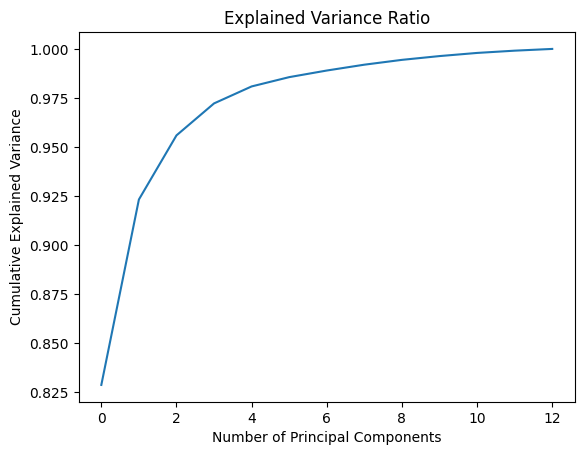

In [36]:
stacked_data = np.concatenate(df_wav_cut['feature_array'].values)

pca = PCA()
pca.fit(stacked_data)
pca_result = pca.transform(stacked_data)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio')
plt.show()

In [85]:
stacked_data = np.stack(df_wav_cut['feature_array'].values)
print(stacked_data.shape)
data_reshaped = np.reshape(stacked_data, (139, 98*13))
print(data_reshaped.shape)

(139, 98, 13)
(139, 1274)


## PCA 13 components

In [86]:
pca = PCA(n_components=13)  # Set the desired number of components
pca.fit(data_reshaped)
reduced_data = pca.transform(data_reshaped)

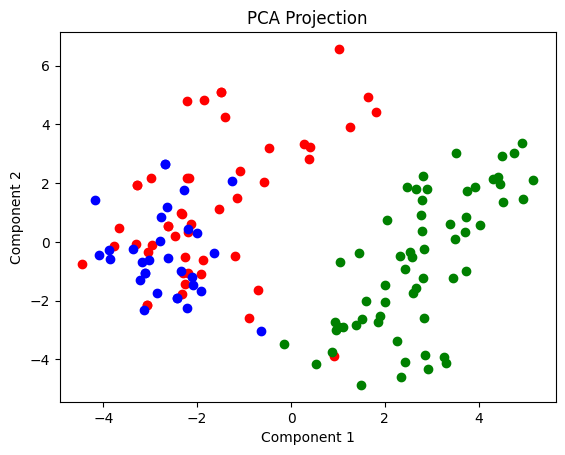

In [105]:
labels = df_wav_cut['class_name'].values.tolist()

# Create a dictionary to map labels to colors for plotting
label_colors = {'mature': 'red', 'immature': 'green', 'overmature': 'blue'}

# Plot the data points in the reduced space
for i in range(len(reduced_data)):
    label = labels[i]
    color = label_colors[label]
    plt.scatter(reduced_data[i, 0], reduced_data[i, 1], c=color, label=label)

# Set plot title and labels
plt.title('PCA Projection')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

# Add a legend
# plt.legend()

# Show the plot
plt.show()

In [28]:
df_wav_cut['feature_array'].values[0]

array([[ 2.00009825e+00, -3.23122781e-01,  1.55573374e-02, ...,
         3.38605493e-02,  2.16454268e-02,  1.71325016e-02],
       [ 2.02122263e+00, -2.93776390e-01,  1.84971701e-02, ...,
         1.41277350e-03, -1.56000613e-02, -8.70259751e-03],
       [ 2.03700220e+00, -3.10501154e-01,  1.21652030e-02, ...,
         1.84085822e-02,  1.04684105e-02,  1.47597369e-03],
       ...,
       [ 1.35246519e+00, -1.25170233e-01, -4.43595536e-02, ...,
        -1.83835645e-03,  4.83790734e-03, -1.50804665e-02],
       [ 1.33225538e+00, -1.34225266e-01, -3.78483511e-02, ...,
        -4.23593582e-03,  1.41154471e-03, -1.00609288e-02],
       [ 1.31965770e+00, -1.18918318e-01, -1.37023519e-02, ...,
        -2.38129914e-02, -2.39146930e-03, -1.28392001e-02]])

In [29]:
df_wav_cut['feature_array'].values[0].shape

(98, 13)

In [31]:
stacked_data = np.stack(df_wav_cut['feature_array'].values)
stacked_data.shape

(139, 98, 13)

In [32]:
stacked_data = np.concatenate(df_wav_cut['feature_array'].values)
stacked_data.shape

(13622, 13)

In [99]:
df_wav_cut['class_name'].unique()

array(['mature', 'immature', 'overmature'], dtype=object)

In [102]:
len(reduced_data)

139

In [103]:
labels = df_wav_cut['class_name'].values.tolist()
labels

['mature',
 'mature',
 'mature',
 'mature',
 'mature',
 'mature',
 'mature',
 'mature',
 'mature',
 'mature',
 'mature',
 'mature',
 'mature',
 'mature',
 'mature',
 'mature',
 'mature',
 'mature',
 'mature',
 'mature',
 'mature',
 'mature',
 'mature',
 'mature',
 'mature',
 'mature',
 'mature',
 'mature',
 'mature',
 'mature',
 'mature',
 'mature',
 'mature',
 'mature',
 'mature',
 'mature',
 'mature',
 'mature',
 'mature',
 'mature',
 'mature',
 'mature',
 'mature',
 'mature',
 'mature',
 'mature',
 'mature',
 'mature',
 'immature',
 'immature',
 'immature',
 'immature',
 'immature',
 'immature',
 'immature',
 'immature',
 'immature',
 'immature',
 'immature',
 'immature',
 'immature',
 'immature',
 'immature',
 'immature',
 'immature',
 'immature',
 'immature',
 'immature',
 'immature',
 'immature',
 'immature',
 'immature',
 'immature',
 'immature',
 'immature',
 'immature',
 'immature',
 'immature',
 'immature',
 'immature',
 'immature',
 'immature',
 'immature',
 'immature',
 'im

In [67]:
X = np.concatenate(df_wav_cut['feature_array'].values)
labels = df_wav_cut[["class_name"]].to_numpy()

X = StandardScaler().fit_transform(X)
cov = (X.T @ X) / (X.shape[0] - 1)
eig_values, eig_vectors = np.linalg.eig(cov)
idx = np.argsort(eig_values, axis=0)[::-1]
sorted_eig_vectors = eig_vectors[:, idx]

In [78]:
df_wav_cut['class_name'].unique()

array(['mature', 'immature', 'overmature'], dtype=object)

([<matplotlib.axis.XTick at 0x2dfca0025f0>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13')])

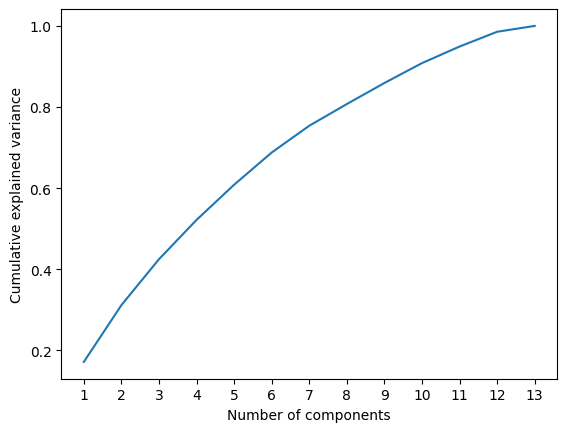

In [68]:
cumsum = np.cumsum(eig_values[idx]) / np.sum(eig_values[idx])
xint = range(1, len(cumsum) + 1)
xint = range(1, len(cumsum) + 1)
plt.plot(xint, cumsum)

plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.xticks(xint)
# plt.xlim(1, 4, 1)

IndexError: list index out of range

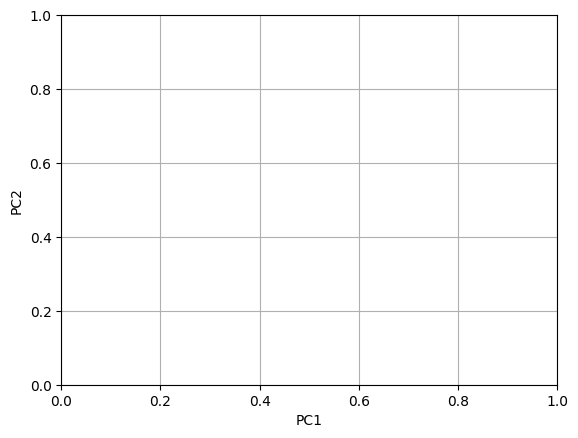

In [72]:
eig_scores = np.dot(X, sorted_eig_vectors[:, :2])
def biplot(score, coeff, labels):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]

    for i, u in enumerate(df_wav_cut['class_name'].unique()):
        xi = [
            score[j, 0] for j in range(score.shape[0]) if df["target"].tolist()[j] == u
        ]
        yi = [
            score[j, 1] for j in range(score.shape[0]) if df["target"].tolist()[j] == u
        ]
        plt.scatter(xi, yi, c=colors[i], label=u)
    for i in range(n):
        plt.arrow(
            0, 0, coeff[i, 0], coeff[i, 1], color="r", head_width=0.05, head_length=0.1
        )
        plt.text(
            coeff[i, 0] * 1.35,
            coeff[i, 1] * 1.35,
            labels[i],
            color="g",
            ha="center",
            va="center",
        )


plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

biplot(eig_scores, sorted_eig_vectors, iris["feature_names"])
plt.legend()

In [55]:
# wavSig, sampRate = librosa.load(immature)
def myFunction(a=2, b=3):
    """
    This function return a+b by default a = 2, b = 3
    """
    return a+b

In [56]:
print(myFunction.__doc__)


    This function return a+b by default a = 2, b = 3
    


In [10]:
# from PNCC.pncc import pncc
import inspect

print(inspect.signature(pncc))

(sig: numpy.ndarray, fs: int = 16000, num_ceps: int = 13, pre_emph: bool = True, pre_emph_coeff: float = 0.97, power=2, window: Optional[spafe.utils.preprocessing.SlidingWindow] = None, nfilts: int = 24, nfft: int = 512, low_freq: Optional[float] = 0, high_freq: Optional[float] = None, scale: Literal['ascendant', 'descendant', 'constant'] = 'constant', dct_type: int = 2, lifter: Optional[int] = None, normalize: Optional[Literal['mvn', 'ms', 'vn', 'mn']] = None, fbanks: Optional[numpy.ndarray] = None, conversion_approach: Literal['Glasberg'] = 'Glasberg') -> numpy.ndarray


In [11]:
df_wav[df_wav['class_name'] == "immature"].values[2][0]

'./Sample-kelapa/data/cut_sample/muda/wav/muda10c.wav'

In [18]:
wavSig, sampRate = librosa.load(df_wav[df_wav['class_name'] == "immature"].values[0][0])

pnccs = pncc(wavSig, fs=sampRate)
print(pnccs)
print(len(pnccs))
print(len(pnccs[0]))

[[ 2.53319145  0.01957585 -0.04323907 ... -0.01702088 -0.00989021
   0.01425896]
 [ 2.53628936  0.03742841 -0.04469385 ... -0.02622217  0.01003448
   0.0212067 ]
 [ 2.59510048  0.076432   -0.03655477 ... -0.02971693  0.00777882
   0.029374  ]
 ...
 [ 2.46678972  0.58625376 -0.39153532 ... -0.05587895 -0.00683492
  -0.01835969]
 [ 2.35247148  0.47661195 -0.40509418 ... -0.04009515  0.01172324
   0.01791286]
 [ 2.29958591  0.50748465 -0.36041421 ... -0.07107468 -0.01061006
   0.0405058 ]]
98
13


In [25]:
pnccs.shape

(98, 13)

In [52]:
df_wav['full_path'].values[6]

'./Sample-kelapa/data/cut_sample/matang/wav/mtg12a.wav'

In [59]:
wavSig, sampRate = librosa.load(df_wav['full_path'].values[6])

pnccs = pncc(wavSig, fs=sampRate)
print(pnccs)
print(len(pnccs))
print(len(pnccs[0]))

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
98
13


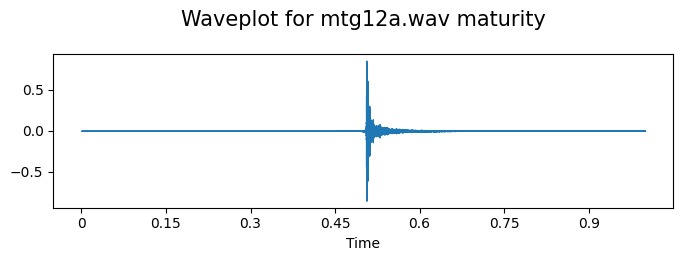

In [55]:
audio_overmature, sr_overmature = librosa.load(df_wav['full_path'].values[6])
createWaveplot(audio_overmature, sr_overmature, f"{df_wav['file_name'].values[6]}")
ipd.Audio(overmature)

In [35]:
df_wav.to_csv('coconut-maturity-wav-extracted.csv', index=False)

In [15]:
df_wav

,full_path,file_name,class_name
0,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg10a.wav,mature
1,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg10b.wav,mature
2,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg10c.wav,mature
3,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg11a.wav,mature
4,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg11b.wav,mature
...,...,...,...
175,./Sample-kelapa/data/cut_sample/tua/wav/tua8b.wav,tua8b.wav,overmature
176,./Sample-kelapa/data/cut_sample/tua/wav/tua8c.wav,tua8c.wav,overmature
177,./Sample-kelapa/data/cut_sample/tua/wav/tua9a.wav,tua9a.wav,overmature
178,./Sample-kelapa/data/cut_sample/tua/wav/tua9b.wav,tua9b.wav,overmature


In [16]:
import spafe.features.pncc as pncc

modules = [module_name for module_name in dir(pncc) if not module_name.startswith('__')]

for module_name in modules:
    print(module_name)

ErbConversionApproach
ErrorMsgs
NormalizationType
Optional
ParameterError
ScaleType
SlidingWindow
asymmetric_lowpass_filtering
asymmetric_noise_suppression_with_temporal_masking
dct
framing
gammatone_filter_banks
lifter_ceps
mean_power_normalization
medium_time_power_calculation
normalize_ceps
np
pncc
pre_emphasis
temporal_masking
weight_smoothing
windowing


medium_time_power_calculation
asymmetric_lowpass_filtering
temporal_masking
weight_smoothing
mean_power_normalization
asymmetric_noise_suppression_with_temporal_masking
pncc

In [15]:
import spafe.utils.vis as vis

modules = [module_name for module_name in dir(vis) if not module_name.startswith('__')]

for module_name in modules:
    print(module_name)

hz2bark
hz2erb
hz2mel
np
show_fbanks
show_features
show_spectrogram
tick_function


In [20]:
print(inspect.signature(vis.show_fbanks))

(fbanks, center_freqs, ref_freqs, title='Mel filter banks', ylabel='Weight', x1label='Frequency / Hz', x2label='Frequency / mel', figsize=(12, 5), fb_type='mel', show_center_freqs=True)


In [28]:
wavSig, sampRate = librosa.load(df_wav[df_wav['class_name'] == "immature"].values[0][0])
# print(wavSig,len(wavSig), sampRate)
pnccs = pncc(wavSig, sampRate)
print(pnccs)
print(len(pnccs))
vis.plot(pnccs, 'PNCC Index','Frame Index')

[[ 2.53319145  0.01957585 -0.04323907 ... -0.01702088 -0.00989021
   0.01425896]
 [ 2.53628936  0.03742841 -0.04469385 ... -0.02622217  0.01003448
   0.0212067 ]
 [ 2.59510048  0.076432   -0.03655477 ... -0.02971693  0.00777882
   0.029374  ]
 ...
 [ 2.46678972  0.58625376 -0.39153532 ... -0.05587895 -0.00683492
  -0.01835969]
 [ 2.35247148  0.47661195 -0.40509418 ... -0.04009515  0.01172324
   0.01791286]
 [ 2.29958591  0.50748465 -0.36041421 ... -0.07107468 -0.01061006
   0.0405058 ]]
98


AttributeError: module 'spafe.utils.vis' has no attribute 'plot'

In [22]:
wavSig, sampRate = librosa.load(df_wav[df_wav['class_name'] == "immature"].values[0][0])

pnccs = pncc(wavSig, fs=sampRate, num_ceps=20)
print(pnccs)
print(len(pnccs))

[[ 2.53319145e+00  1.95758507e-02 -4.32390677e-02 ... -2.66018430e-02
  -3.49896622e-02  2.95450577e-02]
 [ 2.53628936e+00  3.74284075e-02 -4.46938459e-02 ... -1.23823807e-02
  -1.88907641e-02  1.11320925e-02]
 [ 2.59510048e+00  7.64319991e-02 -3.65547736e-02 ... -1.48029057e-02
  -2.16410972e-02  2.26052337e-02]
 ...
 [ 2.46678972e+00  5.86253757e-01 -3.91535322e-01 ... -4.24268303e-02
  -5.92935137e-03  2.81351658e-02]
 [ 2.35247148e+00  4.76611948e-01 -4.05094181e-01 ... -2.44577993e-02
  -5.02032738e-05 -6.75699970e-03]
 [ 2.29958591e+00  5.07484653e-01 -3.60414213e-01 ... -3.56525303e-02
  -2.92122271e-02  9.80314112e-03]]
98


In [8]:
wavSig, sampRate = librosa.load(df_wav[df_wav['class_name'] == "mature"].values[0][0])
# print(wavSig,len(wavSig), sampRate)
pnccs = pncc(wavSig, sampRate)
print(pnccs)
print(len(pnccs))

[[ 2.00009825e+00 -3.23122781e-01  1.55573374e-02 ...  3.38605493e-02
   2.16454268e-02  1.71325016e-02]
 [ 2.02122263e+00 -2.93776390e-01  1.84971701e-02 ...  1.41277350e-03
  -1.56000613e-02 -8.70259751e-03]
 [ 2.03700220e+00 -3.10501154e-01  1.21652030e-02 ...  1.84085822e-02
   1.04684105e-02  1.47597369e-03]
 ...
 [ 1.35246519e+00 -1.25170233e-01 -4.43595536e-02 ... -1.83835645e-03
   4.83790734e-03 -1.50804665e-02]
 [ 1.33225538e+00 -1.34225266e-01 -3.78483511e-02 ... -4.23593582e-03
   1.41154471e-03 -1.00609288e-02]
 [ 1.31965770e+00 -1.18918318e-01 -1.37023519e-02 ... -2.38129914e-02
  -2.39146930e-03 -1.28392001e-02]]
98


In [6]:
df_wav[df_wav['class_name'] == "immature"].values[0][0]

'./Sample-kelapa/data/cut_sample/muda/wav/muda10a.wav'

In [92]:
from PNCC.pncc import pncc

wavSig, sampRate = librosa.load(df_wav[df_wav['class_name'] == "overmature"].values[0][-1])
print(wavSig,len(wavSig), sampRate)
# pnccs = pncc(wavSig)

[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -5.1452625e-05
  1.7647784e-05  2.6764070e-05] 22050 22050


In [131]:
i=5
sigImmature, srImmature = librosa.load(df_wav[df_wav['class_name'] == "immature"].values[i][-1])
sigMature, srMature = librosa.load(df_wav[df_wav['class_name'] == "mature"].values[i][-1])
sigOvermature, srOvermature = librosa.load(df_wav[df_wav['class_name'] == "overmature"].values[i][-1])

print("immature\t:")
print(f"  \u2022 Audio filename\t: {df_wav[df_wav['class_name'] == 'immature'].values[i][-1].split('/')[-1]}")
print(f"  \u2022 Audio sample\t: {sigImmature}")
print(f"  \u2022 Audio sample shape\t: {len(sigImmature)}")
print(f"  \u2022 Audio sample rate\t: {srImmature}\n")
print("mature\t\t:")
print(f"  \u2022 Audio filename\t: {df_wav[df_wav['class_name'] == 'mature'].values[i][-1].split('/')[-1]}")
print(f"  \u2022 Audio sample\t: {sigMature}")
print(f"  \u2022 Audio sample shape\t: {len(sigMature)}")
print(f"  \u2022 Audio sample rate\t: {srMature}\n")
print("overmature\t:")
print(f"  \u2022 Audio filename\t: {df_wav[df_wav['class_name'] == 'overmature'].values[i][-1].split('/')[-1]}")
print(f"  \u2022 Audio sample\t: {sigOvermature}")
print(f"  \u2022 Audio sample shape\t: {len(sigOvermature)}")
print(f"  \u2022 Audio sample rate\t: {srOvermature}\n")

immature	:
  • Audio filename	: muda11c.wav
  • Audio sample	: [-9.57154043e-05 -1.54114110e-04 -5.09603051e-05 ...  1.25326886e-04
  1.21904828e-04  1.00191544e-04]
  • Audio sample shape	: 22056
  • Audio sample rate	: 22050

mature		:
  • Audio filename	: mtg11c.wav
  • Audio sample	: [ 2.4222552e-05  2.5901476e-05 -4.4076723e-06 ... -1.6274418e-04
 -1.3448896e-04  1.3240037e-04]
  • Audio sample shape	: 22050
  • Audio sample rate	: 22050

overmature	:
  • Audio filename	: tua11c.wav
  • Audio sample	: [ 4.1138752e-05  4.4768531e-06 -5.9717233e-05 ...  2.8500042e-05
  3.3108823e-05  7.2935086e-06]
  • Audio sample shape	: 22050
  • Audio sample rate	: 22050



In [135]:
class Employee():
    # 👇️ forgot to take self arg
    def get_name():
        return 'Bobby Hadz'


emp = Employee()

# ⛔️ TypeError: Employee.get_name() takes 0 positional arguments but 1 was given
print(emp.get_name())


TypeError: Employee.get_name() takes 0 positional arguments but 1 was given